In [1]:
import os
import cv2
import numpy as np
import shapely.plotting
import matplotlib.pyplot as plt

from glob import glob
from shapely import Polygon
from shapely.ops import unary_union
from shapely.geometry import LineString

from utils import get_biggest_contour

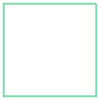

In [2]:
poly = Polygon(np.array(((1,1),(-1,1),(-1,-1),(1,-1)))*0.125*8)
outline = poly.boundary
outline

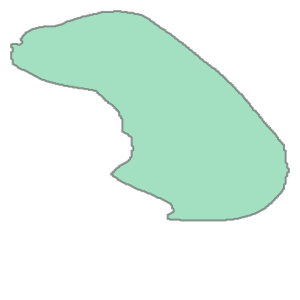

In [3]:
cell_no = 1
f = '2024_06_10_h02b62' # 2024_06_24_h02b67 - damaged, 2024_06_10_h02b62 - perfect
fps = glob(f'../semantic_seg/wings/predictions_resized/{f}*')#*')
fp = fps[0]
mask = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
biggest_contour = get_biggest_contour(mask)
cell = Polygon(biggest_contour.squeeze())
cell

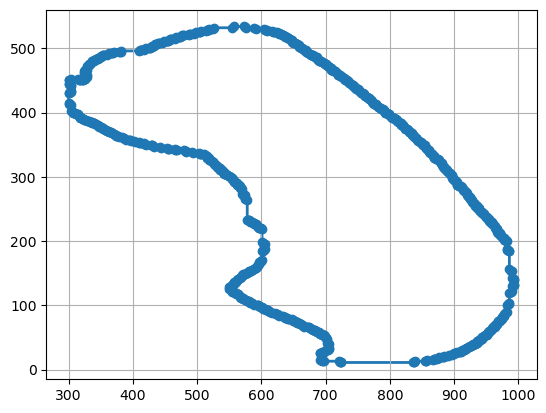

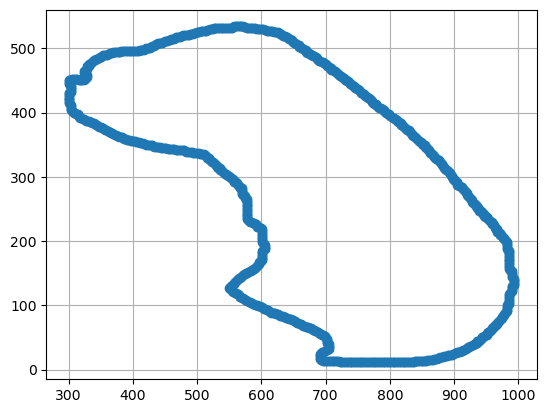

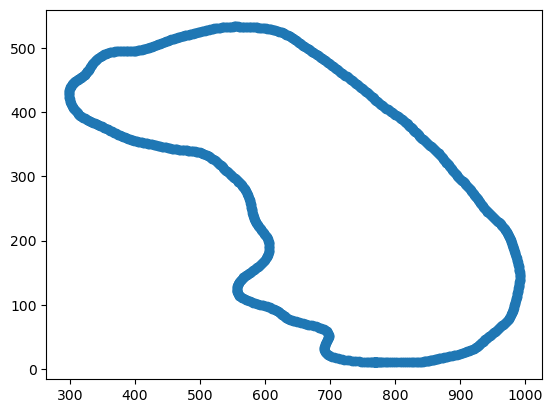

In [15]:
# This is the number of equally spaced points to use to approximate the integration of the
# shape we are approximating
n_discrete_points = 1000
# This is the number of 'positive' circles to approximate the shape with
n_pos_circles = 25

n_estimation_points = 1000

# Strange things happen if we approximate the function with more circles than we discretized the points with...
# pretty though!
if n_pos_circles > n_discrete_points:
    print('WARNING! STRANGE AND POSSIBLY PRETTY THINGS WILL HAPPEN....')

outline = cell.boundary
shapely.plotting.plot_line(outline)


distance_delta = outline.length / n_discrete_points
distances = np.arange(0, outline.length, distance_delta)
points = [outline.interpolate(distance) for distance in distances]
multipoint = unary_union(points)
plt.figure()
shapely.plotting.plot_points(multipoint)

complex_points = [p.x + p.y*1j for p in points]
t_delta = 1 / n_discrete_points
times = np.arange(0, 1, t_delta)

if len(times) + 1 == len(complex_points):
    times = np.append(times, [1])


cs = {}
for n in range(-n_pos_circles,n_pos_circles+1):
    cs[n] = np.multiply(t_delta, np.multiply(complex_points, np.e**(-2*np.pi*1j*n*times))).sum()
cs

t_delta = 1 / n_estimation_points
times = np.arange(0, 1, t_delta)

fts = []
for t in times:
    ft = 0
    for n in range(-n_pos_circles,n_pos_circles+1):
        ft += np.multiply(cs[n], np.e**(-2*np.pi*1j*n*t))
                          
    fts += [ft]
fts = np.array(fts)

plt.figure()
plt.scatter(fts.real, fts.imag)

In [10]:
(Polygon([(x.real, x.imag) for x in fts]) - cell).area / cell.area

0.005491964138428953

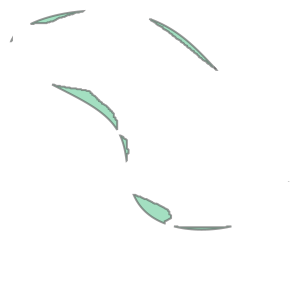

In [13]:
(Polygon([(x.real, x.imag) for x in fts]) - cell)

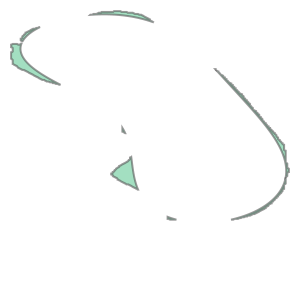

In [14]:
(cell - Polygon([(x.real, x.imag) for x in fts]))

In [9]:
Polygon([(x.real, x.imag) for x in fts])

(<POLYGON ((810.513 35.084, 812.007 35.017, 813.495 34.959, 814.977 34.911, 8...>,
 <POLYGON ((724 11, 723 12, 722 12, 721 13, 697 13, 696 14, 695 14, 694 15, 6...>)

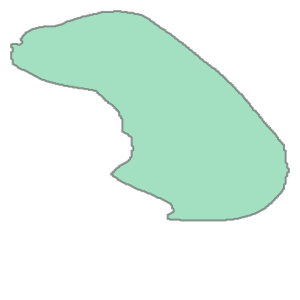

In [10]:
cell

In [50]:
n=1
np.e**(-2*np.pi*1j*n*distances)

array([ 1.        +0.00000000e+00j,  0.80901699-5.87785252e-01j,
        0.30901699-9.51056516e-01j, -0.30901699-9.51056516e-01j,
       -0.80901699-5.87785252e-01j, -1.        -1.22464680e-16j,
       -0.80901699+5.87785252e-01j, -0.30901699+9.51056516e-01j,
        0.30901699+9.51056516e-01j,  0.80901699+5.87785252e-01j,
        1.        +2.44929360e-16j,  0.80901699-5.87785252e-01j,
        0.30901699-9.51056516e-01j, -0.30901699-9.51056516e-01j,
       -0.80901699-5.87785252e-01j, -1.        -3.67394040e-16j,
       -0.80901699+5.87785252e-01j, -0.30901699+9.51056516e-01j,
        0.30901699+9.51056516e-01j,  0.80901699+5.87785252e-01j,
        1.        +4.89858720e-16j,  0.80901699-5.87785252e-01j,
        0.30901699-9.51056516e-01j, -0.30901699-9.51056516e-01j,
       -0.80901699-5.87785252e-01j, -1.        -6.12323400e-16j,
       -0.80901699+5.87785252e-01j, -0.30901699+9.51056516e-01j,
        0.30901699+9.51056516e-01j,  0.80901699+5.87785252e-01j,
        1.        +7.3478

In [35]:
len(complex_points), len(distances)

(80, 80)